In [1]:
import numpy as np
import cv2
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_cat = os.path.join('C:/Users/n_int/Documents/ML project/Computer vision/cat-and-dog/training_set/training_set/cats')
#C:/Users/natdanai.intraraksa/Downloads/cat-and-dog/training_set/training_set/cats
train_dog = os.path.join('C:/Users/n_int/Documents/ML project/Computer vision/cat-and-dog/training_set/training_set/dogs')
#test dataset for cats
test_cat = os.path.join('C:/Users/n_int/Documents/ML project/Computer vision/cat-and-dog/test_set/test_set/cats')
#test dataset for dogs
train_dog = os.path.join('C:/Users/n_int/Documents/ML project/Computer vision/cat-and-dog/test_set/test_set/dogs')

In [3]:
name_cat = os.listdir(train_cat)
name_dog = os.listdir(train_dog)

In [4]:
print('Length of cat_train {}'.format(len(os.listdir(train_cat))))
print('Length of dog_train {}'.format(len(os.listdir(train_dog))))

Length of cat_train 4001
Length of dog_train 1013


In [5]:
train_cat_name = [os.path.join(train_cat,fname) for fname in name_cat[:5]]
train_dog_name = [os.path.join(train_dog,fname) for fname in name_dog[:5]]

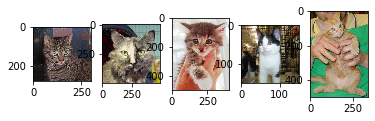

In [6]:
f,ax = plt.subplots(1,5)
for i,j in enumerate(train_cat_name):
    img = plt.imread(j)
    ax[i].imshow(img)
plt.show()

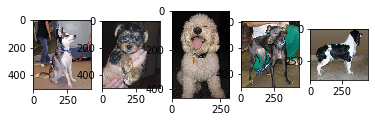

In [7]:
f,ax = plt.subplots(1,5)
for i,j in enumerate(train_dog_name):
    img = plt.imread(j)
    ax[i].imshow(img)
plt.show()

In [8]:
import tensorflow as tf
from tensorflow import keras

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dense(64,activation = 'relu'))
model.add(keras.layers.Dense(1,activation = 'sigmoid'))

In [17]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
             optimizer = RMSprop(lr = 0.001),
             metrics = ['acc'])

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

train_gen = train_datagen.flow_from_directory(
    'C:/Users/n_int/Documents/ML project/Computer vision/cat-and-dog/training_set/training_set',
      target_size = (150,150),
      batch_size = 128,
      class_mode = 'binary')

test_gen = test_datagen.flow_from_directory(
    'C:/Users/n_int/Documents/ML project/Computer vision/cat-and-dog/test_set/test_set',
      target_size = (150,150),
      batch_size = 128,
      class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [19]:
history = model.fit_generator(train_gen,epochs=25,verbose=1,steps_per_epoch=5)

Epoch 1/25
5/5 [==============================] - 12s 2s/step - loss: 3.1341 - acc: 0.4891
Epoch 2/25
5/5 [==============================] - 9s 2s/step - loss: 0.6937 - acc: 0.5359
Epoch 3/25
5/5 [==============================] - 11s 2s/step - loss: 0.6939 - acc: 0.4938
Epoch 4/25
5/5 [==============================] - 9s 2s/step - loss: 0.6919 - acc: 0.4991
Epoch 5/25
5/5 [==============================] - 10s 2s/step - loss: 0.6954 - acc: 0.4906
Epoch 6/25
5/5 [==============================] - 16s 3s/step - loss: 0.6952 - acc: 0.4672
Epoch 7/25
5/5 [==============================] - 12s 2s/step - loss: 0.7218 - acc: 0.5109
Epoch 8/25
5/5 [==============================] - 14s 3s/step - loss: 0.6932 - acc: 0.5000
Epoch 9/25
5/5 [==============================] - 15s 3s/step - loss: 0.6955 - acc: 0.5141
Epoch 10/25
5/5 [==============================] - 10s 2s/step - loss: 0.6940 - acc: 0.4781
Epoch 11/25
5/5 [==============================] - 10s 2s/step - loss: 0.6922 - acc: 0.4891